# Reproduce results of a network  article

In this notebook, we'll try to reproduce the results in paper titled  "A nonparametric significance test for sampled networks" [web link](https://academic.oup.com/bioinformatics/article/34/1/64/3931855), [pdf  link](https://academic.oup.com/bioinformatics/article-pdf/34/1/64/25113551/btx419.pdf)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# !pip install networkx

    100% |████████████████████████████████| 1.7MB 1.3MB/s 
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built networkx


In [2]:
import networkx as nx
petersen = nx.petersen_graph()

In [3]:
petersen.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [4]:
petersen.edges

EdgeView([(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)])

/srv/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


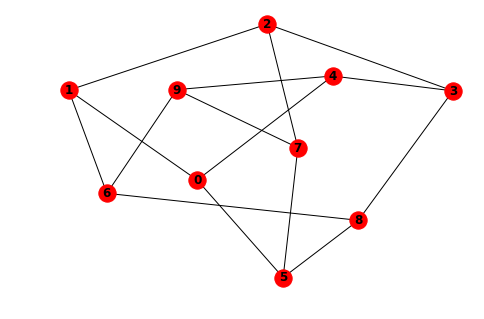

In [5]:
nx.draw(petersen, with_labels=True, font_weight='bold')

/srv/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


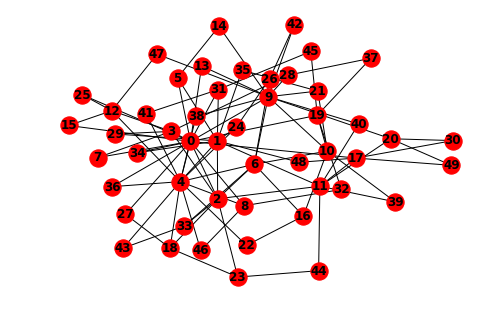

In [6]:
import random
random.seed(1234)  
ba = nx.barabasi_albert_graph(50, 2)
nx.draw(ba, with_labels=True, font_weight='bold')

In [7]:
ba.edges

EdgeView([(0, 2), (0, 3), (0, 4), (0, 5), (0, 7), (0, 8), (0, 9), (0, 13), (0, 15), (0, 17), (0, 19), (0, 25), (0, 27), (0, 31), (0, 34), (0, 36), (1, 2), (1, 4), (1, 5), (1, 11), (1, 24), (1, 29), (1, 31), (1, 34), (1, 35), (1, 48), (2, 3), (2, 6), (2, 11), (2, 18), (2, 23), (2, 33), (3, 7), (3, 12), (3, 28), (3, 29), (4, 6), (4, 8), (4, 12), (4, 18), (4, 22), (4, 24), (4, 36), (4, 38), (4, 41), (4, 43), (4, 46), (5, 14), (6, 9), (6, 10), (6, 16), (6, 26), (6, 33), (8, 32), (8, 46), (9, 10), (9, 13), (9, 14), (9, 20), (9, 21), (9, 28), (9, 38), (9, 40), (9, 42), (9, 47), (10, 16), (10, 19), (10, 21), (10, 39), (11, 17), (11, 20), (11, 39), (11, 40), (11, 44), (12, 15), (12, 25), (12, 47), (16, 22), (17, 30), (17, 48), (17, 49), (18, 23), (18, 27), (19, 32), (19, 37), (19, 45), (20, 30), (20, 49), (21, 35), (23, 44), (24, 26), (26, 42), (28, 37), (31, 41), (31, 45), (33, 43)])

In [8]:
str(type(ba))

"<class 'networkx.classes.graph.Graph'>"

In [9]:
def snowballsample(G,node_list,number_of_hops=2): #testing code
    nodes2add=[list(node_list)]
    for hop in range(number_of_hops):
        temp=[]
        for node in nodes2add[hop]:
            temp+=G[node]
        nodes2add.append(temp)
    H=G.subgraph(sum(nodes2add,[]))
    H.to_undirected()
    return H

In [30]:
result = snowballsample(ba,[33], 1)
result.edges

EdgeView([(33, 2), (33, 6), (33, 43), (2, 6)])

In [37]:
nods=list([33])
ba[nods[0]]

AtlasView({2: {}, 6: {}, 43: {}})

In [50]:
[x for x in ba.neighbors(33)]

[2, 6, 43]

In [51]:
ba[33]

AtlasView({2: {}, 6: {}, 43: {}})

In [59]:
my_nodes=[]
for x in ba.neighbors(33):

    for y in ba[x]:
        my_nodes.append(y)
print(set(my_nodes))

{0, 1, 33, 3, 2, 4, 6, 9, 10, 11, 16, 18, 23, 26}


In [11]:
result2 = snowballsample(ba,[33], 2)
result2.edges
result2.nodes

NodeView((0, 33, 2, 1, 3, 4, 6, 9, 10, 43, 11, 16, 18, 23, 26))

In [25]:
import sys 
import os
sys.path.append(os.path.relpath("external_files/"))
from sampling import *

IndentationError: unindent does not match any outer indentation level (sampling.py, line 165)

## Import data from BioGRID

Used `tidygraph` to import and clean the original data and then saved the edgelist as csv.

In [7]:
import networkx as nx
import pandas as pd


In [3]:
test = nx.read_edgelist("external_files/biogrid_hs_y2h_largest.csv", delimiter=',')

TypeError: Failed to convert edge data (['']) to dictionary.

In [6]:
with open('external_files/biogrid_hs_y2h_largest.csv', 'rb') as inf:
    next(inf, '')   # skip a line
    G = nx.read_edgelist(inf, "from", "to", delimiter=',', nodetype=int, encoding="utf-8")

TypeError: read_edgelist() got multiple values for argument 'delimiter'

In [9]:
df = pd.read_csv("external_files/biogrid_hs_y2h_largest.csv")
df

,from,to,#BioGRID Interaction ID,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Pubmed ID,Organism Interactor A,Organism Interactor B,Throughput,Score,Modification,Phenotypes,Qualifications,Tags,Source Database
0,1,2531,103,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,9006895,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
1,2,2367,117,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,11309420,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
2,3,2459,183,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,8599089,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
3,4,1493,278,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,10938104,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
4,5,2628,418,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,10875894,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
5,6,590,586,106870,116775,-,-,ARF1,GGA3,-,...,10747089,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
6,7,339,612,106872,117174,-,-,ARF3,ARFIP2,-,...,9038142,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
7,7,6609,617,106872,118084,-,-,ARF3,ARFIP1,-,...,9038142,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
8,8,4482,663,119970,106728,-,-,XRN1,ALDOA,SEP1,...,15231747,9606,9606,High Throughput,-,-,-,-,-,BIOGRID
9,9,871,866,106848,115769,-,-,APP,APPBP2,AAA|ABETA|ABPP|AD1|APPI|CTFgamma|CVAP|PN-II|PN2,...,9843960,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID


In [24]:
#G=nx.from_pandas_dataframe(df, 'from', 'to')
G= nx.from_pandas_edgelist(df,'BioGRID ID Interactor A','BioGRID ID Interactor B',['Official Symbol Interactor A','Official Symbol Interactor B'])

In [36]:
seeds=[112506,117520]

In [37]:
[G[seed] for seed in seeds]

[AtlasView({114986: {'Official Symbol Interactor A': 'SNCAIP', 'Official Symbol Interactor B': 'SNCA'}, 112422: {'Official Symbol Interactor A': 'SLC6A3', 'Official Symbol Interactor B': 'SNCA'}, 115017: {'Official Symbol Interactor A': 'SNCA', 'Official Symbol Interactor B': 'PDE4DIP'}, 106830: {'Official Symbol Interactor A': 'SNCA', 'Official Symbol Interactor B': 'APLP1'}, 124527: {'Official Symbol Interactor A': 'SNCA', 'Official Symbol Interactor B': 'DOCK7'}, 108868: {'Official Symbol Interactor A': 'SNCA', 'Official Symbol Interactor B': 'GAPDH'}, 107454: {'Official Symbol Interactor A': 'SNCA', 'Official Symbol Interactor B': 'CDK4'}, 106523: {'Official Symbol Interactor A': 'SNCA', 'Official Symbol Interactor B': 'A1BG'}, 108237: {'Official Symbol Interactor A': 'SNCA', 'Official Symbol Interactor B': 'EEF1A1'}, 114215: {'Official Symbol Interactor A': 'SNCA', 'Official Symbol Interactor B': 'EIF3G'}, 119334: {'Official Symbol Interactor A': 'SNCA', 'Official Symbol Interacto